In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('vehicles.csv')
data.head()

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
0,7222695916,https://prescott.craigslist.org/cto/d/prescott...,prescott,https://prescott.craigslist.org,6000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,az,NaN,NaN,NaN
1,7218891961,https://fayar.craigslist.org/ctd/d/bentonville...,fayetteville,https://fayar.craigslist.org,11900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ar,NaN,NaN,NaN
2,7221797935,https://keys.craigslist.org/cto/d/summerland-k...,florida keys,https://keys.craigslist.org,21000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,fl,NaN,NaN,NaN
3,7222270760,https://worcester.craigslist.org/cto/d/west-br...,worcester / central MA,https://worcester.craigslist.org,1500,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ma,NaN,NaN,NaN
4,7210384030,https://greensboro.craigslist.org/cto/d/trinit...,greensboro,https://greensboro.craigslist.org,4900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,nc,NaN,NaN,NaN


Filter certain prices first for feasible products to do EDA with

In [11]:
data = data[(data['price'] > 1000) & (data['price'] < 100000)]

## Dataset Description Statistics

In [40]:
print('The data includes {} rows (used car listings) and {} columns.'.format(data.shape[0], data.shape[1]))

The data includes 378659 rows (used car listings) and 26 columns.


Numerical Columns

In [22]:
data.describe()

,id,price,year,odometer,county,lat,long
count,3.786590e+05,378659.000000,377497.000000,3.765880e+05,0.0,375213.000000,375213.000000
mean,7.311456e+09,19416.465524,2011.001144,9.809761e+04,NaN,38.505508,-94.285332
std,4.474049e+06,14320.108898,9.567361,1.841765e+05,NaN,5.838847,18.063606
min,7.207408e+09,1002.000000,1900.000000,0.000000e+00,NaN,-84.122245,-159.719900
25%,7.308070e+09,7995.000000,2008.000000,3.833675e+04,NaN,34.708828,-110.891800
50%,7.312553e+09,15991.000000,2013.000000,8.763400e+04,NaN,39.193119,-87.994400
75%,7.315237e+09,27990.000000,2017.000000,1.360000e+05,NaN,42.350000,-80.828819
max,7.317101e+09,99999.000000,2022.000000,1.000000e+07,NaN,82.390818,167.629911


Null Counts

In [52]:
pd.DataFrame(data.isna().sum()).rename({0: 'num_null'}, axis='columns').sort_values(by = 'num_null', ascending=False)

,num_null
county,378659
size,271951
cylinders,154532
VIN,144948
condition,142533
drive,114412
paint_color,108018
type,80496
manufacturer,14795
title_status,6551


## Figures

# State EDA

Text(0.5, 1.0, 'Average Price of Used Car per State')

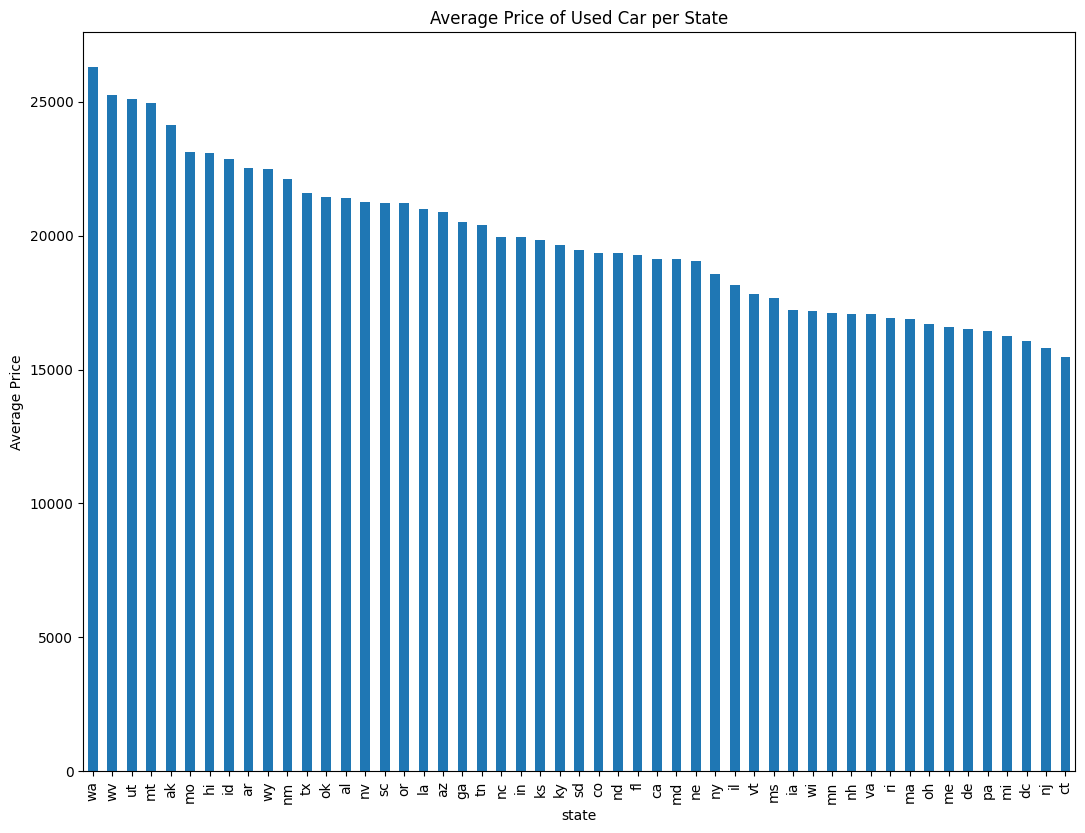

In [36]:
plt.figure(figsize=(12.8,9.6))
data.groupby('state').mean().price.sort_values(ascending=False).plot(kind='bar')
plt.xticks(fontsize=10, rotation=90)
plt.ylabel('Average Price')
plt.title('Average Price of Used Car per State')

# Manufacturer EDA

Text(0.5, 1.0, 'Number of Listings per Manufacturer')

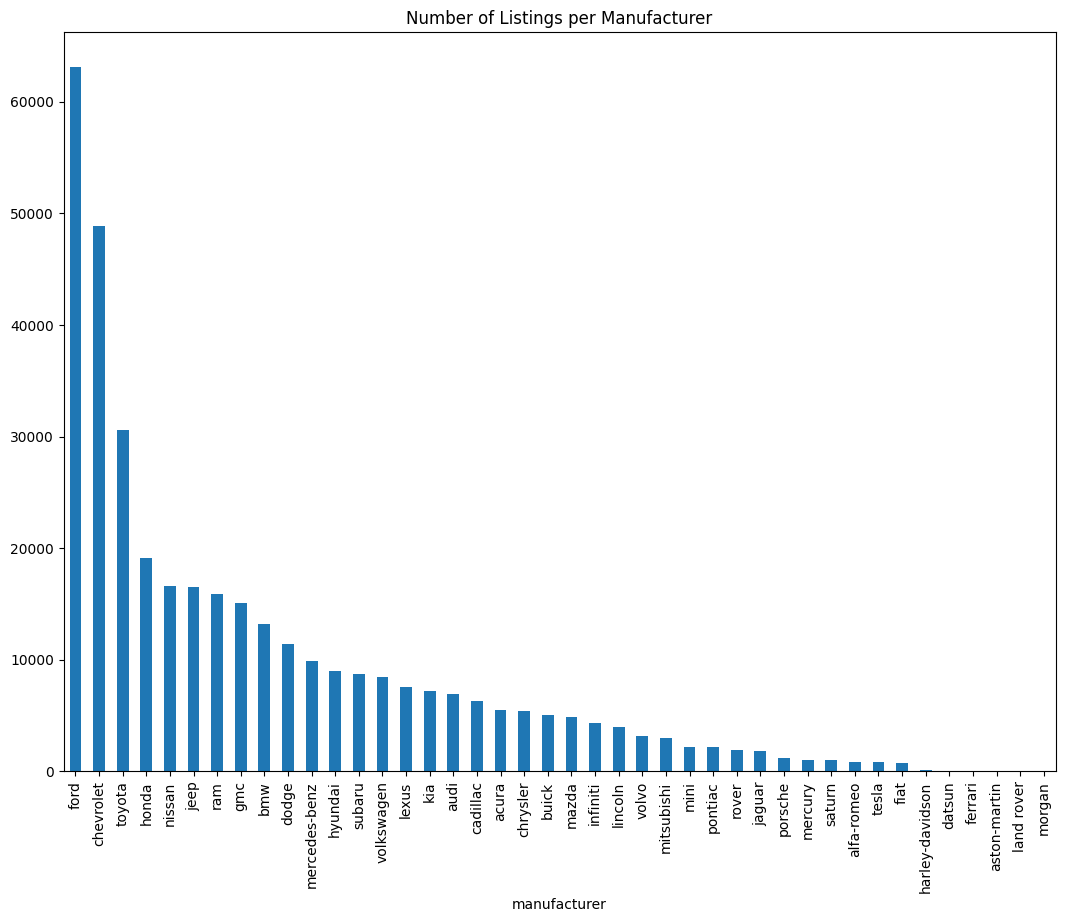

In [65]:
plt.figure(figsize=(12.8,9.6))
data.groupby('manufacturer').count().price.sort_values(ascending=False).plot(kind='bar')
plt.xticks(fontsize=10, rotation=90)
plt.title('Number of Listings per Manufacturer')

Interesting that Ford and Chevy are so pervalent in this dataset. All usual suspects in top cars sold - lincoln being above both volvo and mitsubishi is a slight shock to me. 

Text(0.5, 1.0, 'Average Price of Used Car per Manufacturer')

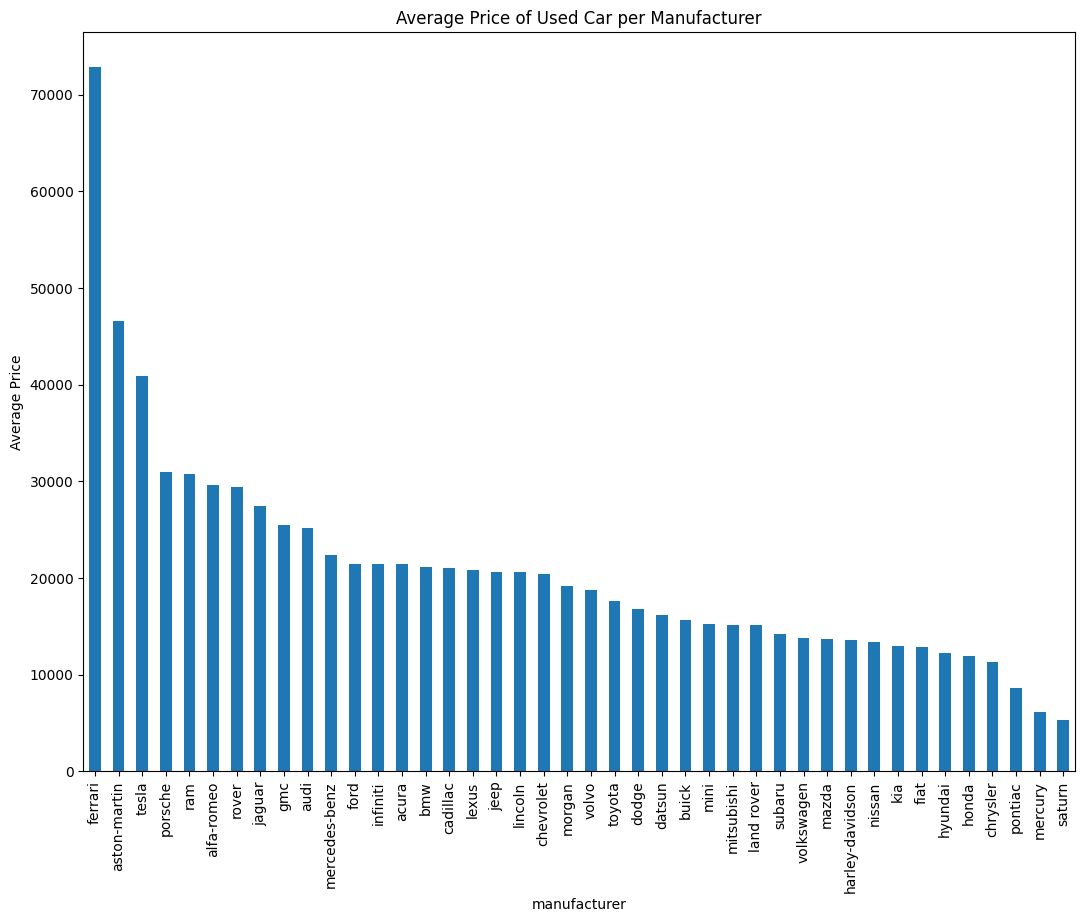

In [57]:
plt.figure(figsize=(12.8,9.6))
data.groupby('manufacturer').mean().price.sort_values(ascending=False).plot(kind='bar')
plt.xticks(fontsize=10, rotation=90)
plt.ylabel('Average Price')
plt.title('Average Price of Used Car per Manufacturer')

As to be expected, the super nice car manufacturers like Ferrar and Aston Martin and more are averaging a much higher price than most vehicles. Note how low honda is on this list despite being one of the most represented manufacturers in the dataset (Good Deals?). 

# Title Status EDA

Text(0.5, 1.0, 'Number of Listings per Title Status')

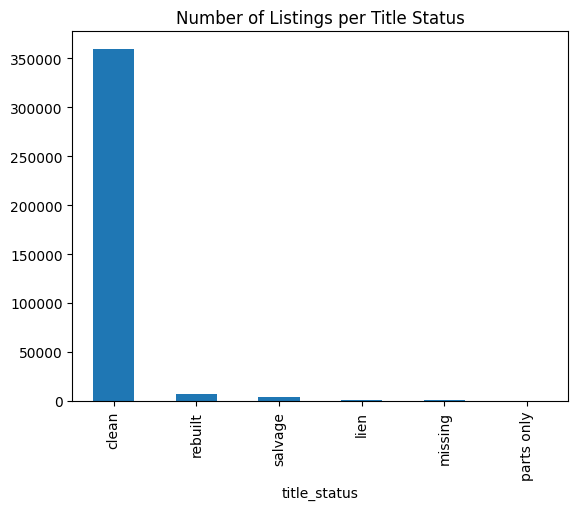

In [64]:
data.groupby('title_status').count().price.sort_values(ascending=False).plot(kind='bar')
plt.xticks(fontsize=10, rotation=90)
plt.title('Number of Listings per Title Status')

The vast majority of car titles here are clean, this is great as it gives a better idea into the true price of the vehicle rather than if its, for example, been in an accident and has a salvage title. To be expected that the majority is clean.<br>
Sketchy missing titles :)

Text(0.5, 1.0, 'Average Price per Title Status')

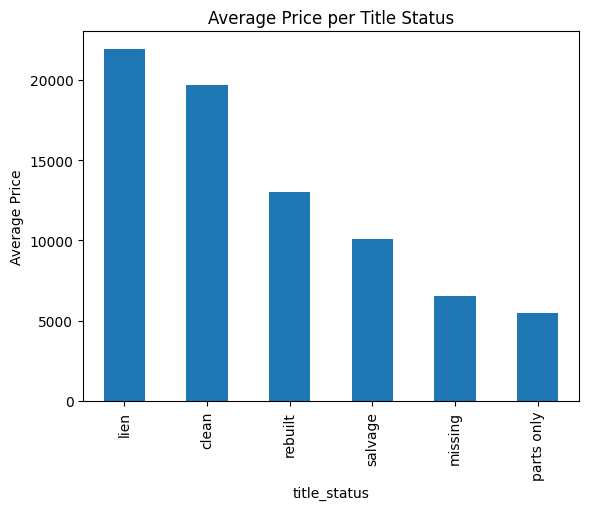

In [66]:
data.groupby('title_status').mean().price.sort_values(ascending=False).plot(kind='bar')
plt.xticks(fontsize=10, rotation=90)
plt.ylabel('Average Price')
plt.title('Average Price per Title Status')

Interesting that clean titles arent on average more expensive than Lien titles. (Maybe because less represented in dataset)
<br>
Other titles' average prices are very much to be expected.

## Condition EDA

Text(0.5, 1.0, 'Number of Listing per Car Condition')

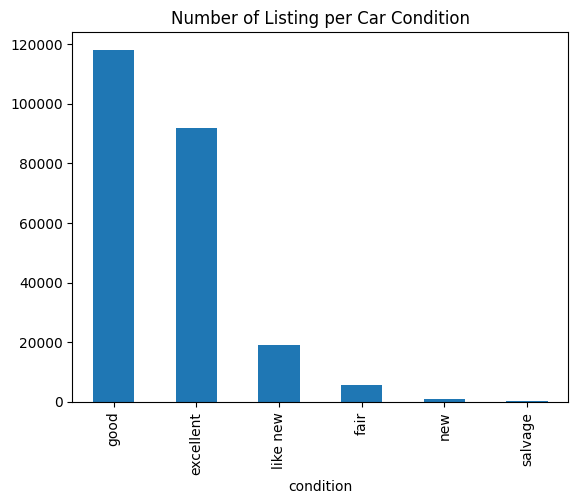

In [68]:
data.groupby('condition').count().price.sort_values(ascending=False).plot(kind='bar')
plt.xticks(fontsize=10, rotation=90)
plt.title('Number of Listing per Car Condition')

Interestingly enough, some new cars are sold on craiglist! Such a small minority that it will not effect our predictions.

Text(0.5, 1.0, 'Average Price per Car Condition')

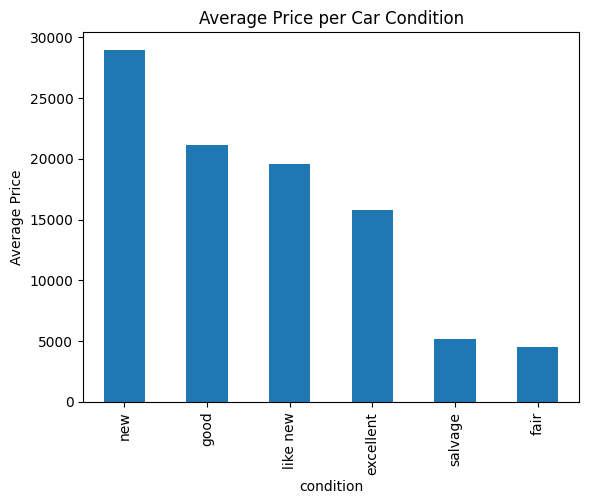

In [69]:
data.groupby('condition').mean().price.sort_values(ascending=False).plot(kind='bar')
plt.xticks(fontsize=10, rotation=90)
plt.ylabel('Average Price')
plt.title('Average Price per Car Condition')

Salvage better than fair? Must be due to low representation in dataset, listing asking for too much probably.